# Plotting some vowels

Welcome to this notebook! It is a small modification of the Englishvowelplots notebook that you may have used to plot your own vowel space for **HW6**. The only subtantive difference in the data is that it expects _four_ columns now:
- vowel: the identity of the vowel
- word: the word that the vowel is from
- F1: as before
- F2: as before

This will allow you, if you want, to look at the variation between vowel productions based on the specific words they came from. You can also skip forward to the second plot, which averages the F1 and F2 values for each of the vowel qualities. 

You can also add other columns you might be interested in, such as 'year' if you're looking at longitudinal data and want to see how someone's vowel space has changed over time, or 'context' if you are interested in looking at differences between word list elicitations and spontaneous or read speech. There are many possibilities! Please don't hesitate to get in touch with your GSI or Prof. Lin if you're interested in exploring some of these factors and don't know how to get started modifying this code. We'd love to chat with you!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 1. Find and read the data

This notebook assumes that there is a file called 'formants.csv' located in the same directory as the notebook itself. You should upload one by going to your Datahub home page and using the "upload" button on the right panel, and follow the instructions. This file should be a CSV file, with at least four columns:
- vowel: the identity of the vowel
- word: the word that the vowel is from
- F1: as usual
- F2: as usual

In [2]:
formantfile = os.path.abspath('./formants2.csv')

Now read in and check the data.

In [3]:
formantdf = pd.read_csv(formantfile) # read this file as a dataframe
formantdf.head() # show just the first five rows of this new dataframe

,vowel,word,F1,F2
0,i,bead,265.243007,2856.897855
1,ɛ,bed,647.557415,2050.247128
2,ɪ,bid,382.105632,2304.680007
3,e,bade,399.658142,2451.130401
4,æ,bad,912.582344,1975.055854


## 2. Make a plot

We're doing almost the same thing here as we did last time. What's new here is
- We skipped the cardinal vowels.
- We're plotting multiple words with (supposedly) the same vowel. This helps us see if there's any systematic variation that has to do with the context that the vowels are in. Here I was curious what the effects of nasalization on these vowels might be, and you can see that there's not much of an effect in general but some vowels do show nasal vowel variation (compared to oral vowels).

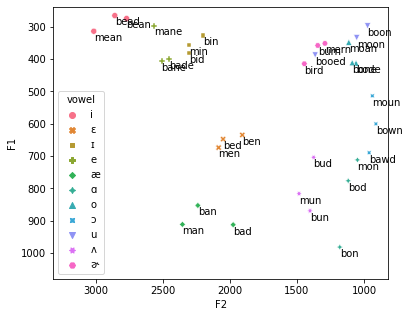

In [4]:
plt.figure(figsize=(6,5))
vplot = sns.scatterplot(x='F2', y='F1', data = formantdf, style='vowel', hue='vowel')
formantdf.apply(lambda x: vplot.text(x.F2, x.F1+30, x.word), axis=1)
vplot.set(xlim=(formantdf.F2.max()*1.1,formantdf.F2.min()*0.9),
          ylim=(formantdf.F1.max()*1.1,formantdf.F1.min()*0.9))
plt.savefig('manyvowelsplot.pdf')

You might also find that you just want the plot itself without all the words because you want to be able to better see the variation. If so, you can just remove the 3rd line in the previous cell.

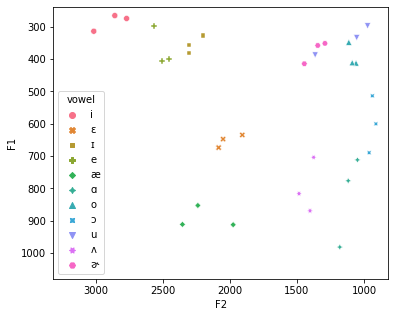

In [7]:
plt.figure(figsize=(6,5))
vplot = sns.scatterplot(x='F2', y='F1', data = formantdf, style='vowel', hue='vowel')
vplot.set(xlim=(formantdf.F2.max()*1.1,formantdf.F2.min()*0.9),
          ylim=(formantdf.F1.max()*1.1,formantdf.F1.min()*0.9))
plt.savefig('manyvowelsplot_notext.pdf')

## 3. Find average formant values and then plot

But maybe we're not that interested in variation, and we just want a nice average vowel plot. We can use the `groupby` method in `pandas` to average together the F1 and F2 values. (There is more than one way to do this, and even more ways to handle displaying the "generic" vowel space; this is just probably the simplest.)

In [5]:
meandf = formantdf.groupby(['vowel']).mean().reset_index()
meandf.head()

,vowel,F1,F2
0,e,367.413936,2507.357115
1,i,284.408531,2879.897867
2,o,390.513204,1086.863133
3,u,339.170139,1130.580971
4,æ,892.394115,2188.685285


Now plot (and save)!

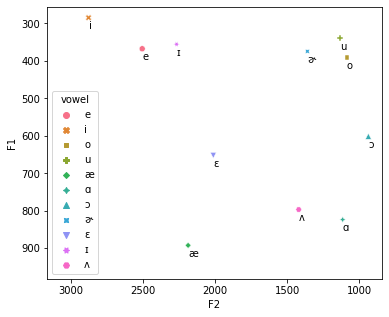

In [6]:
plt.figure(figsize=(6,5))
vplot = sns.scatterplot(x='F2', y='F1', data = meandf, style='vowel', hue='vowel')
meandf.apply(lambda x: vplot.text(x.F2, x.F1+30, x.vowel), axis=1)
vplot.set(xlim=(meandf.F2.max()*1.1,meandf.F2.min()*0.9),
          ylim=(meandf.F1.max()*1.1,meandf.F1.min()*0.9))
plt.savefig('meanvowelplot.pdf')